

---


#  🟢 Plota Gráfico de Barras da Quantidade de Focos de Calor por Estado para 2025


---
**DADOS**:

 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/

- Dados: Focos de calor do INPE na frequência mensal - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/



---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---



# **1° Passo:** Preparando ambiente

In [9]:
# instalações
!pip install -q ultraplot

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos
import seaborn as sns

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

# **2° Passo:** Lendo os Dados do INPE

## Lendo os dados de 2003-2024
- São os dados por `ANO` do `Brasil` do satélite de referência `AQUA`.

In [10]:
%%time
# cria uma tabela vazia
df_2003_a_2024 = pd.DataFrame()

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# ano inicial e final: neste caso de 2003 a 2024
anoi, anof = '2003', '2025'

# loop dos meses
for ano in range(int(anoi), int(anof)):
    print(ano)

    # nome do arquivo
    filename = f'focos_br_ref_{str(ano)}.zip'

    # leitura da tabela: 2023
    df0 = pd.read_csv(f'{url}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df_2003_a_2024 = pd.concat([df0, df_2003_a_2024], ignore_index=True)

# remove colunas
df_2003_a_2024.drop(['id_bdq','foco_id','pais'], axis=1, inplace=True)

# renomeia coluna
df_2003_a_2024.rename(columns={'data_pas': 'data'}, inplace=True)

# reposiciona as colunas
df_2003_a_2024 = df_2003_a_2024[['data','lat','lon','municipio','estado','bioma']]

# mostra o dataframe
df_2003_a_2024

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CPU times: user 22 s, sys: 4.09 s, total: 26.1 s
Wall time: 3min 43s


,data,lat,lon,municipio,estado,bioma
0,2024-01-02 17:04:00,-15.89572,-38.89957,BELMONTE,BAHIA,Mata Atlântica
1,2024-01-02 17:06:00,-7.49188,-38.88316,BREJO SANTO,CEARÁ,Caatinga
2,2024-01-02 17:06:00,-6.50564,-39.44122,CARIÚS,CEARÁ,Caatinga
3,2024-01-02 17:06:00,-6.50409,-39.43422,CARIÚS,CEARÁ,Caatinga
4,2024-01-02 17:06:00,-5.74166,-39.59352,MOMBAÇA,CEARÁ,Caatinga
...,...,...,...,...,...,...
5107968,2003-09-26 16:30:00,-11.71700,-49.33000,DUERÉ,TOCANTINS,Cerrado
5107969,2003-09-26 18:08:00,-13.65700,-57.39400,DIAMANTINO,MATO GROSSO,Cerrado
5107970,2003-10-07 16:13:00,-5.87600,-44.64400,TUNTUM,MARANHÃO,Cerrado
5107971,2003-10-09 17:37:00,-12.27900,-60.48900,VILHENA,RONDÔNIA,Amazônia


## Lendo os dados de 2025
- São os dados por `MÊS` do `Brasil` de `TODOS` satélites.

In [11]:
%%time
# cria uma tabela
df_2025 = pd.DataFrame()

# FTP dos dados mensal de 2025 do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/'

# loop dos meses de 2025, até o mês 09
for data in pd.date_range('20250101','20251001', freq='1M'):

    # extrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')
    print(ano, mes)

    # nome do arquivo
    filename = f'focos_mensal_br_{ano}{mes}.csv'

    # leitura da tabela
    df0 = pd.read_csv(f'{url}{filename}')

    # junta a tabela que foi lida com a anterior
    df_2025 = pd.concat([df_2025, df0], ignore_index=True)

# seleciona apenas para MG e para o satélite de referência AQUA_M-T
#df_2025 = df_2025[ (df_2025['estado']=='MINAS GERAIS') & (df_2025['satelite']=='AQUA_M-T') ]
df_2025 = df_2025[ df_2025['satelite'] == 'AQUA_M-T' ]

# renomeia coluna
df_2025.rename(columns={'data_hora_gmt': 'data'}, inplace=True)

# reposiciona as colunas
df_2025 = df_2025[['data','lat','lon','municipio','estado','bioma']]

# mostra tabela
df_2025

2025 01
2025 02
2025 03
2025 04
2025 05
2025 06
2025 07
2025 08
2025 09
CPU times: user 6.59 s, sys: 1.06 s, total: 7.64 s
Wall time: 1min 59s


,data,lat,lon,municipio,estado,bioma
1419,2025-01-01 16:52:00,-8.70136,-36.58537,CAPOEIRAS,PERNAMBUCO,Caatinga
1420,2025-01-01 16:52:00,-7.25636,-38.53855,BONITO DE SANTA FÉ,PARAÍBA,Caatinga
1421,2025-01-01 16:52:00,-7.60073,-37.72230,SOLIDÃO,PERNAMBUCO,Caatinga
1422,2025-01-01 16:52:00,-12.31578,-37.87934,ENTRE RIOS,BAHIA,Mata Atlântica
1423,2025-01-01 16:52:00,-12.30725,-37.89272,ENTRE RIOS,BAHIA,Mata Atlântica
...,...,...,...,...,...,...
1390123,2025-09-03 19:08:00,-3.20710,-60.60226,MANACAPURU,AMAZONAS,Amazônia
1390124,2025-09-03 19:08:00,-3.80178,-65.10154,ALVARÃES,AMAZONAS,Amazônia
1390125,2025-09-03 19:08:00,-5.27116,-60.41924,NOVO ARIPUANÃ,AMAZONAS,Amazônia
1390126,2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia


## Junta os dados de 2003-2024 com 2025

In [12]:
# junta os dataframes
df = pd.concat([df_2003_a_2024, df_2025], ignore_index=True)

# transforma a coluna "datahora" para o formato "datetime"
df['data'] = pd.to_datetime(df['data'])

# seta a coluna "datahora" como o índice da tabela
df.set_index('data', inplace=True)

# ordena a tabela pelo índice
df.sort_index(inplace=True)

# mostra o dataframe final
df

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.27600,-41.51400,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-14.82900,-40.13300,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.67500,-37.03400,ROSÁRIO DO CATETE,SERGIPE,Mata Atlântica
2003-01-01 16:05:00,-10.15600,-36.17400,CORURIPE,ALAGOAS,Mata Atlântica
...,...,...,...,...,...
2025-09-03 19:08:00,-5.13636,-62.54185,TAPAUÁ,AMAZONAS,Amazônia
2025-09-03 19:08:00,-3.43706,-59.56544,CAREIRO DA VÁRZEA,AMAZONAS,Amazônia
2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia


# **3° Passo:** Cálculos


 - Seleciona os dados para 2025 e separa em dataframes para as 5 regiões do Brasil

In [13]:
# mostra os dados que serão utilizados
df.tail(2)

,lat,lon,municipio,estado,bioma
data,,,,,
2025-09-03 19:08:00,-3.40182,-59.57648,CAREIRO DA VÁRZEA,AMAZONAS,Amazônia
2025-09-03 19:08:00,-3.40381,-59.58965,CAREIRO DA VÁRZEA,AMAZONAS,Amazônia


In [14]:
#=====================================================================================#
#                     SELECIONA PARA O ANO DE 2025
#=====================================================================================#
df_2025 = df.loc['2025']

#=====================================================================================#
#                      SEPARA POR REGIÃO DO BRASIL
#=====================================================================================#
# Definir as regiões com os nomes completos dos estados em maiúsculas
regioes = {'norte': ['ACRE', 'AMAPÁ', 'AMAZONAS', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS'],
           'nordeste': ['ALAGOAS', 'BAHIA', 'CEARÁ', 'MARANHÃO', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'RIO GRANDE DO NORTE', 'SERGIPE'],
           'centro_oeste': ['DISTRITO FEDERAL', 'GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL'],
           'sudeste': ['ESPÍRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SÃO PAULO'],
           'sul': ['PARANÁ', 'RIO GRANDE DO SUL', 'SANTA CATARINA']}

# Criar um dicionário com os dataframes de cada região
dataframes_regioes = {}

for nome_regiao, estados in regioes.items():
    dataframes_regioes[nome_regiao] = df_2025[df_2025['estado'].isin(estados)].copy()

    # Adicionar uma coluna com o nome da região
    dataframes_regioes[nome_regiao]['regiao'] = nome_regiao

# Acessar os dataframes individualmente
df_norte = dataframes_regioes['norte']
df_nordeste = dataframes_regioes['nordeste']
df_centro_oeste = dataframes_regioes['centro_oeste']
df_sudeste = dataframes_regioes['sudeste']
df_sul = dataframes_regioes['sul']

# Verificar se há estados que não foram classificados em nenhuma região
estados_unicos = df_2025['estado'].unique()
estados_classificados = [estado for regiao in regioes.values() for estado in regiao]
estados_nao_classificados = [estado for estado in estados_unicos if estado not in estados_classificados]

if estados_nao_classificados:
    print(f"Atenção: Os seguintes estados não foram classificados em nenhuma região: {estados_nao_classificados}")

# Mostrar o tamanho de cada dataframe por região
print("\nQuantidade de ocorrências por região:")
for regiao, df_regiao in dataframes_regioes.items():
    print(f"{regiao.upper()}: {len(df_regiao)} ocorrências")

# Criar dataframes separados para cada região
df_norte = df_2025[df_2025['estado'].isin(regioes['norte'])].copy()
df_nordeste = df_2025[df_2025['estado'].isin(regioes['nordeste'])].copy()
df_centro_oeste = df_2025[df_2025['estado'].isin(regioes['centro_oeste'])].copy()
df_sudeste = df_2025[df_2025['estado'].isin(regioes['sudeste'])].copy()
df_sul = df_2025[df_2025['estado'].isin(regioes['sul'])].copy()

# Adicionar coluna de região a cada dataframe
df_norte['regiao'] = 'norte'
df_nordeste['regiao'] = 'nordeste'
df_centro_oeste['regiao'] = 'centro_oeste'
df_sudeste['regiao'] = 'sudeste'
df_sul['regiao'] = 'sul'


#.groupby(pd.Grouper(freq='1M')).count()['estado']


Quantidade de ocorrências por região:
NORTE: 14886 ocorrências
NORDESTE: 16377 ocorrências
CENTRO_OESTE: 10451 ocorrências
SUDESTE: 4921 ocorrências
SUL: 3522 ocorrências


 - Contabiliza a quantide de focos de calor para cada estado das 5 regiões do Brasil

In [15]:
# Para a região Norte
contagem_norte = df_norte['estado'].value_counts().reset_index()
contagem_norte.columns = ['Estado', 'Ocorrências']
contagem_norte['Região'] = 'Norte'
print("Região Norte:")
print(contagem_norte)
print()

# Para a região Nordeste
contagem_nordeste = df_nordeste['estado'].value_counts().reset_index()
contagem_nordeste.columns = ['Estado', 'Ocorrências']
contagem_nordeste['Região'] = 'Nordeste'
print("Região Nordeste:")
print(contagem_nordeste)
print()

# Para a região Centro-Oeste
contagem_centro_oeste = df_centro_oeste['estado'].value_counts().reset_index()
contagem_centro_oeste.columns = ['Estado', 'Ocorrências']
contagem_centro_oeste['Região'] = 'Centro-Oeste'
print("Região Centro-Oeste:")
print(contagem_centro_oeste)
print()

# Para a região Sudeste
contagem_sudeste = df_sudeste['estado'].value_counts().reset_index()
contagem_sudeste.columns = ['Estado', 'Ocorrências']
contagem_sudeste['Região'] = 'Sudeste'
print("Região Sudeste:")
print(contagem_sudeste)
print()

# Para a região Sul
contagem_sul = df_sul['estado'].value_counts().reset_index()
contagem_sul.columns = ['Estado', 'Ocorrências']
contagem_sul['Região'] = 'Sul'
print("Região Sul:")
print(contagem_sul)

Região Norte:
      Estado  Ocorrências Região
0  TOCANTINS         5786  Norte
1       PARÁ         3747  Norte
2   AMAZONAS         2475  Norte
3   RONDÔNIA         1047  Norte
4    RORAIMA          953  Norte
5       ACRE          853  Norte
6      AMAPÁ           25  Norte

Região Nordeste:
                Estado  Ocorrências    Região
0             MARANHÃO         6719  Nordeste
1                BAHIA         4209  Nordeste
2                PIAUÍ         3557  Nordeste
3                CEARÁ          757  Nordeste
4           PERNAMBUCO          457  Nordeste
5              PARAÍBA          244  Nordeste
6  RIO GRANDE DO NORTE          175  Nordeste
7              SERGIPE          136  Nordeste
8              ALAGOAS          123  Nordeste

Região Centro-Oeste:
               Estado  Ocorrências        Região
0         MATO GROSSO         7155  Centro-Oeste
1               GOIÁS         2046  Centro-Oeste
2  MATO GROSSO DO SUL         1116  Centro-Oeste
3    DISTRITO FEDERAL     

# **4° Passo:** Plota Figura - `REGIÃO NORTE`

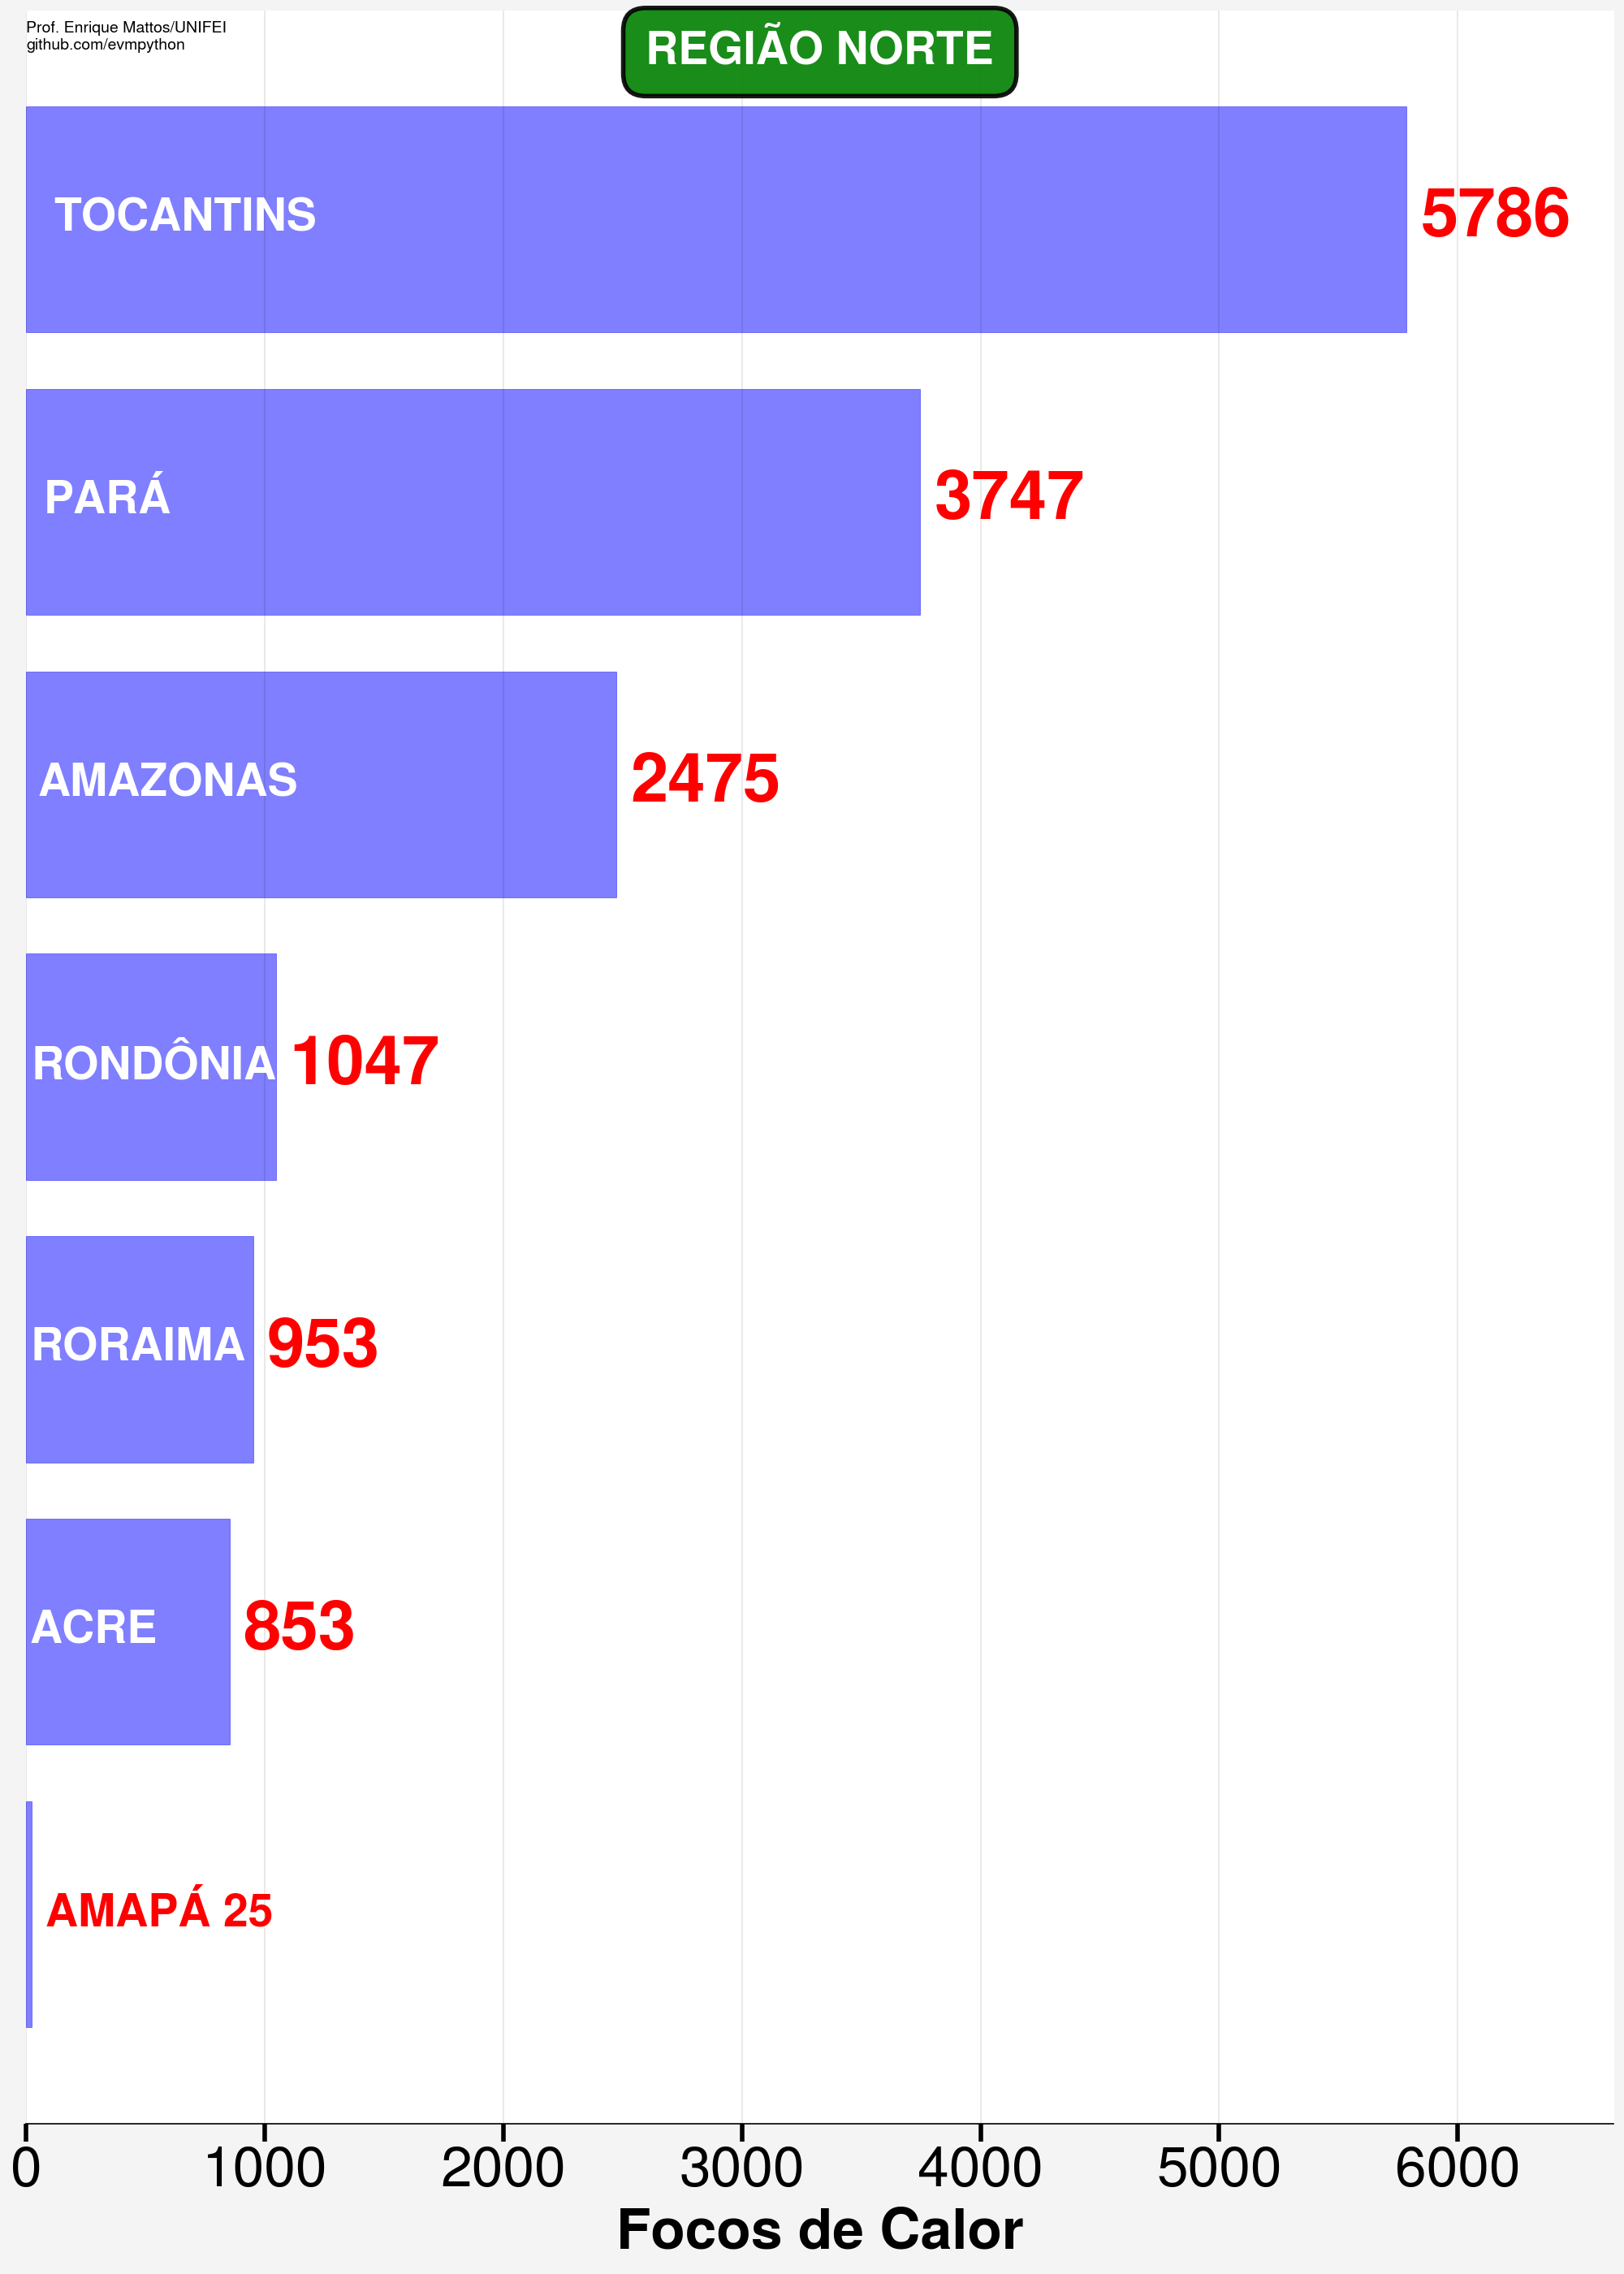

In [36]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,14), tight=True)

# Ordena os dados por ocorrências (do maior para o menor)
contagem_norte_ordenada = contagem_norte.sort_values('Ocorrências', ascending=False)

# plota gráfico de barras horizontais
bars = ax.barh(contagem_norte_ordenada['Estado'],
               contagem_norte_ordenada['Ocorrências'],
               color='blue',
               alpha=0.5)

# Remove o eixo Y (linhas e ticks)
ax.yaxis.set_visible(False)

# Adiciona os nomes dos estados e valores
for i, (bar, estado, ocorrencias) in enumerate(zip(bars, contagem_norte_ordenada['Estado'], contagem_norte_ordenada['Ocorrências'])):

    if ocorrencias < 500:
        # Para barras pequenas: coloca nome do estado e valor no final da barra
        ax.text(bar.get_width() + (max(contagem_norte_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{estado} {ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='red')
    else:
        # Para barras grandes: nome no início e valor no final
        # Nome do estado no início da barra
        ax.text(bar.get_width() * 0.02,
                bar.get_y() + bar.get_height()/2,
                estado,
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='white')

        # Valor no final da barra
        ax.text(bar.get_width() + (max(contagem_norte_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=30, fontweight='bold',
                color='red')

# Inverte o eixo Y para que a barra com maior valor fique no topo
ax.invert_yaxis()

# formatação do eixo com tamanho aumentado dos labels do eixo X
ax.format(xlabel='Focos de Calor',
          ylabel='',  # Remove o label do eixo Y
          small='25px',
          large='17px',
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

# Aumenta significativamente o tamanho dos labels do eixo X
ax.tick_params(axis='x', labelsize=25)  # Tamanho aumentado para 25

# Remove as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajusta os limites do eixo X para dar espaço para os textos
ax.set_xlim(0, max(contagem_norte_ordenada['Ocorrências']) * 1.15)

# Aumenta o tamanho do label do eixo X
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

# Aumenta também o tamanho dos ticks do eixo X
ax.tick_params(axis='x', which='major', length=8, width=2)

# Adiciona título personalizado com caixa amarela e texto vermelho
title = ax.text(0.5, 0.97, 'REGIÃO NORTE',
                transform=ax.transAxes,
                fontsize=20,
                fontweight='bold',
                color='white',
                ha='center',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='green',
                         edgecolor='black',
                         linewidth=2,
                         alpha=0.9))

# informação na figura
ax.text(1,-0.6, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black', zorder=5)

# salva figura
fig.savefig(f'08a_focos_por_estado_regiao_norte_2025.jpg', transparent=True, dpi=300, bbox_inches="tight")

# exibe figura na tela
uplt.show()

# **5° Passo:** Plota Figura - `REGIÃO NORDESTE`

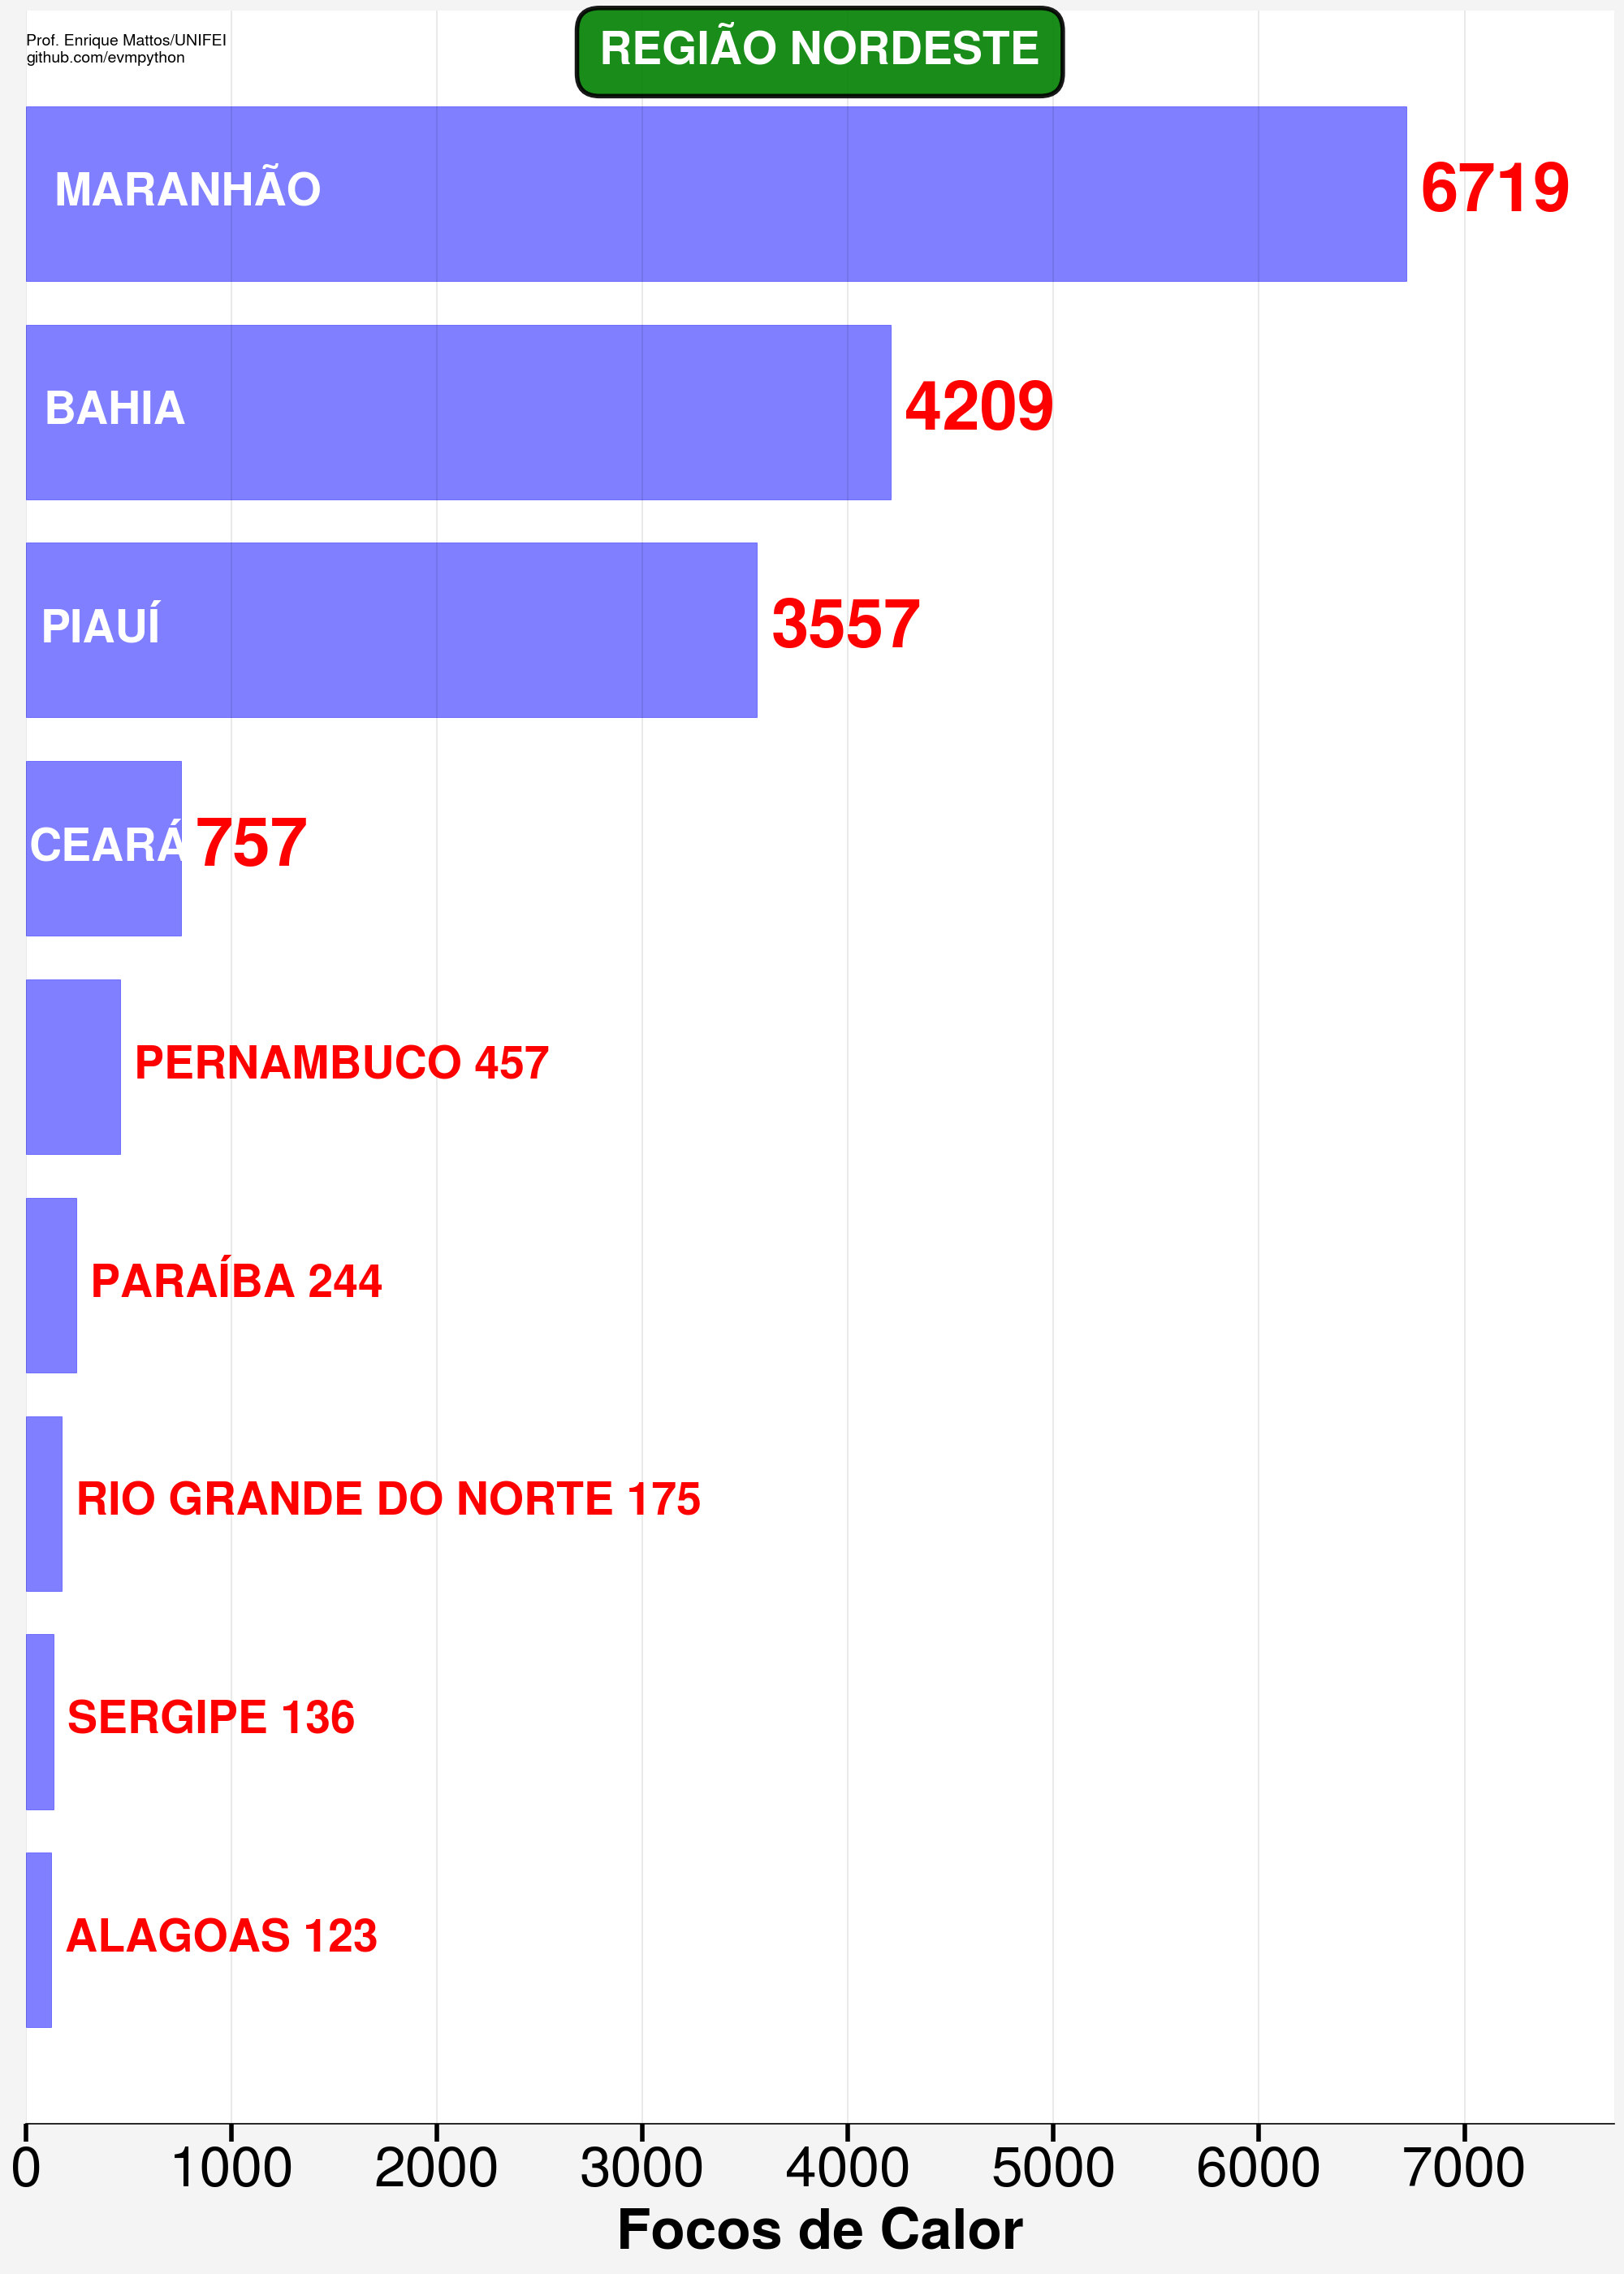

In [37]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,14), tight=True)

# Ordena os dados por ocorrências (do maior para o menor)
contagem_nordeste_ordenada = contagem_nordeste.sort_values('Ocorrências', ascending=False)

# plota gráfico de barras horizontais
bars = ax.barh(contagem_nordeste_ordenada['Estado'],
               contagem_nordeste_ordenada['Ocorrências'],
               color='blue',
               alpha=0.5)

# Remove o eixo Y (linhas e ticks)
ax.yaxis.set_visible(False)

# Adiciona os nomes dos estados e valores
for i, (bar, estado, ocorrencias) in enumerate(zip(bars, contagem_nordeste_ordenada['Estado'], contagem_nordeste_ordenada['Ocorrências'])):

    if ocorrencias < 500:
        # Para barras pequenas: coloca nome do estado e valor no final da barra
        ax.text(bar.get_width() + (max(contagem_nordeste_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{estado} {ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='red')
    else:
        # Para barras grandes: nome no início e valor no final
        # Nome do estado no início da barra
        ax.text(bar.get_width() * 0.02,
                bar.get_y() + bar.get_height()/2,
                estado,
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='white')

        # Valor no final da barra
        ax.text(bar.get_width() + (max(contagem_nordeste_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=30, fontweight='bold',
                color='red')

# Inverte o eixo Y para que a barra com maior valor fique no topo
ax.invert_yaxis()

# formatação do eixo com tamanho aumentado dos labels do eixo X
ax.format(xlabel='Focos de Calor',
          ylabel='',  # Remove o label do eixo Y
          small='25px',
          large='17px',
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

# Aumenta significativamente o tamanho dos labels do eixo X
ax.tick_params(axis='x', labelsize=25)  # Tamanho aumentado para 25

# Remove as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajusta os limites do eixo X para dar espaço para os textos
ax.set_xlim(0, max(contagem_nordeste_ordenada['Ocorrências']) * 1.15)

# Aumenta o tamanho do label do eixo X
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

# Aumenta também o tamanho dos ticks do eixo X
ax.tick_params(axis='x', which='major', length=8, width=2)

# Adiciona título personalizado com caixa amarela e texto vermelho
title = ax.text(0.5, 0.97, 'REGIÃO NORDESTE',
                transform=ax.transAxes,
                fontsize=20,
                fontweight='bold',
                color='white',
                ha='center',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='green',
                         edgecolor='black',
                         linewidth=2,
                         alpha=0.9))

# informação na figura
ax.text(1,-0.6, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black', zorder=5)

# salva figura
fig.savefig(f'08b_focos_por_estado_regiao_nordeste_2025.jpg', transparent=True, dpi=300, bbox_inches="tight")

# exibe figura na tela
uplt.show()

# **6° Passo:** Plota Figura - `REGIÃO CENTRO-OESTE`

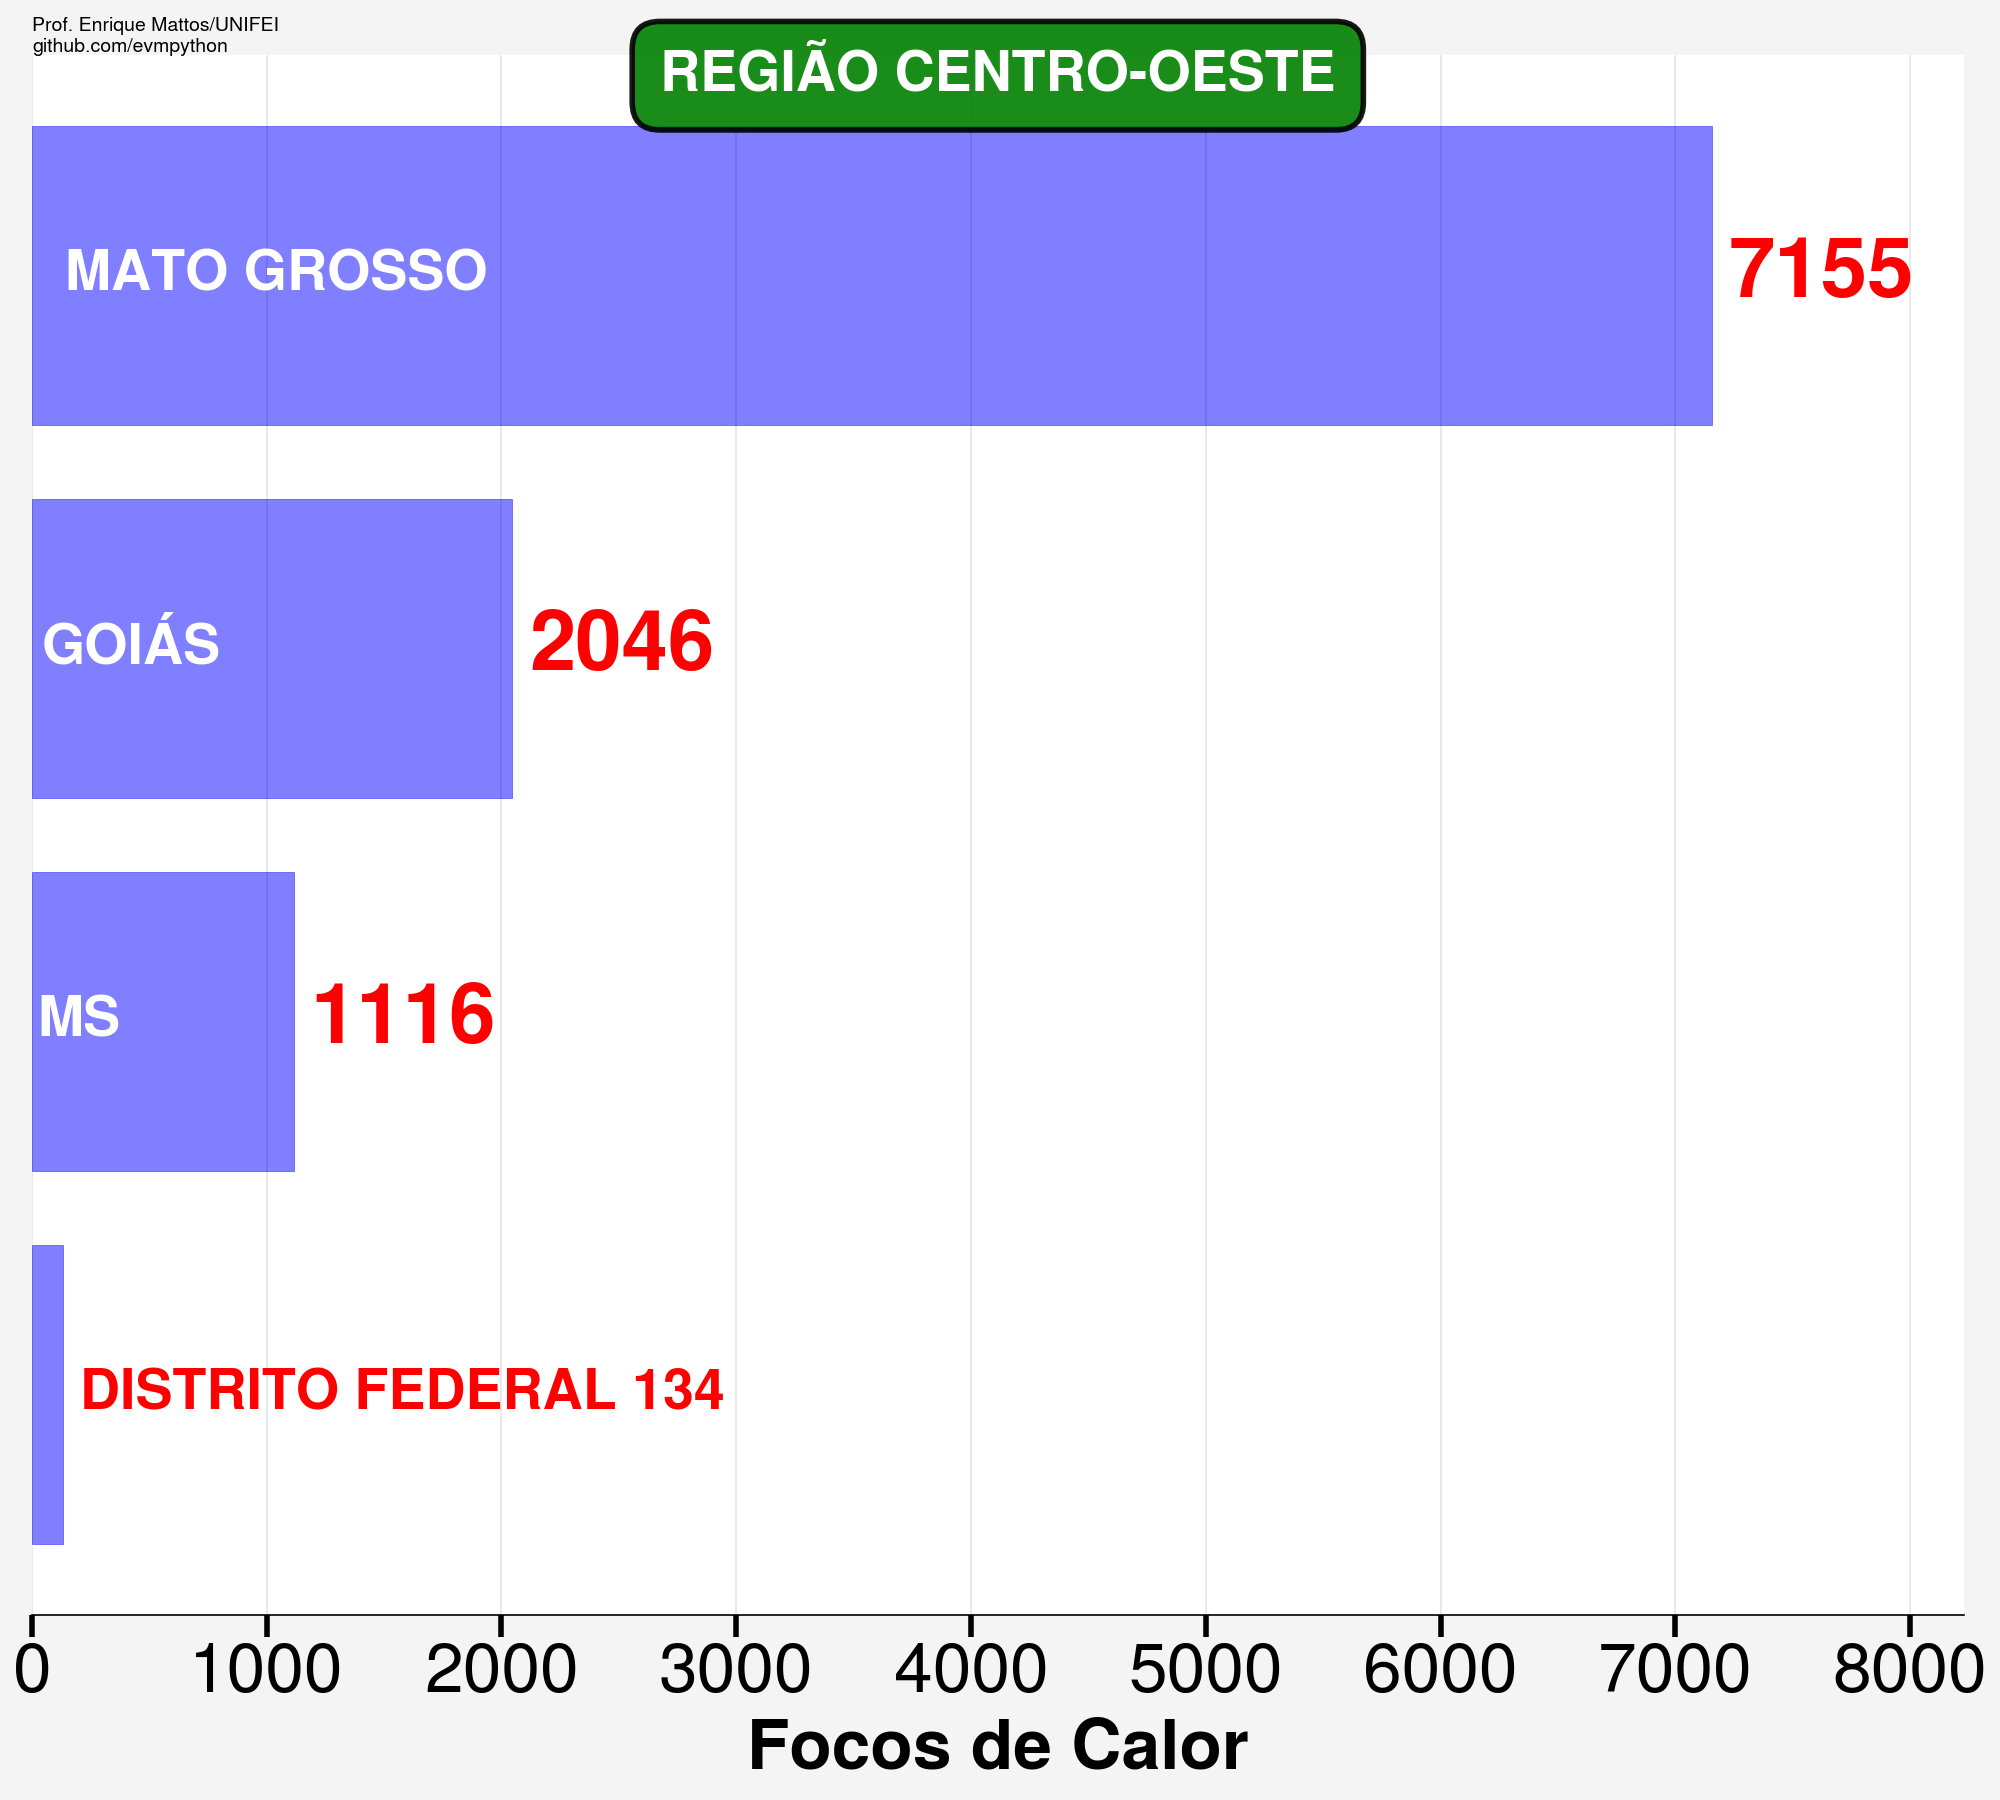

In [41]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,9), tight=True)

# Ordena os dados por ocorrências (do maior para o menor)
contagem_centro_oeste_ordenada = contagem_centro_oeste.sort_values('Ocorrências', ascending=False)

# plota gráfico de barras horizontais
bars = ax.barh(contagem_centro_oeste_ordenada['Estado'],
               contagem_centro_oeste_ordenada['Ocorrências'],
               color='blue',
               alpha=0.5)

# Remove o eixo Y (linhas e ticks)
ax.yaxis.set_visible(False)

# Adiciona os nomes dos estados e valores
for i, (bar, estado, ocorrencias) in enumerate(zip(bars, contagem_centro_oeste_ordenada['Estado'], contagem_centro_oeste_ordenada['Ocorrências'])):

    if estado == 'MATO GROSSO DO SUL' : estado = 'MS'
    if ocorrencias < 500:
        # Para barras pequenas: coloca nome do estado e valor no final da barra
        ax.text(bar.get_width() + (max(contagem_centro_oeste_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{estado} {ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='red')
    else:
        # Para barras grandes: nome no início e valor no final
        # Nome do estado no início da barra
        ax.text(bar.get_width() * 0.02,
                bar.get_y() + bar.get_height()/2,
                estado,
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='white')

        # Valor no final da barra
        ax.text(bar.get_width() + (max(contagem_centro_oeste_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=30, fontweight='bold',
                color='red')

# Inverte o eixo Y para que a barra com maior valor fique no topo
ax.invert_yaxis()

# formatação do eixo com tamanho aumentado dos labels do eixo X
ax.format(xlabel='Focos de Calor',
          ylabel='',  # Remove o label do eixo Y
          small='25px',
          large='17px',
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

# Aumenta significativamente o tamanho dos labels do eixo X
ax.tick_params(axis='x', labelsize=25)  # Tamanho aumentado para 25

# Remove as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajusta os limites do eixo X para dar espaço para os textos
ax.set_xlim(0, max(contagem_centro_oeste_ordenada['Ocorrências']) * 1.15)

# Aumenta o tamanho do label do eixo X
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

# Aumenta também o tamanho dos ticks do eixo X
ax.tick_params(axis='x', which='major', length=8, width=2)

# Adiciona título personalizado com caixa amarela e texto vermelho
title = ax.text(0.5, 0.97, 'REGIÃO CENTRO-OESTE',
                transform=ax.transAxes,
                fontsize=20,
                fontweight='bold',
                color='white',
                ha='center',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='green',
                         edgecolor='black',
                         linewidth=2,
                         alpha=0.9))

# informação na figura
ax.text(1,-0.6, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black', zorder=5)

# salva figura
fig.savefig(f'08c_focos_por_estado_regiao_centro_oeste_2025.jpg', transparent=True, dpi=300, bbox_inches="tight")

# exibe figura na tela
uplt.show()

# **7° Passo:** Plota Figura - `REGIÃO SUDESTE`

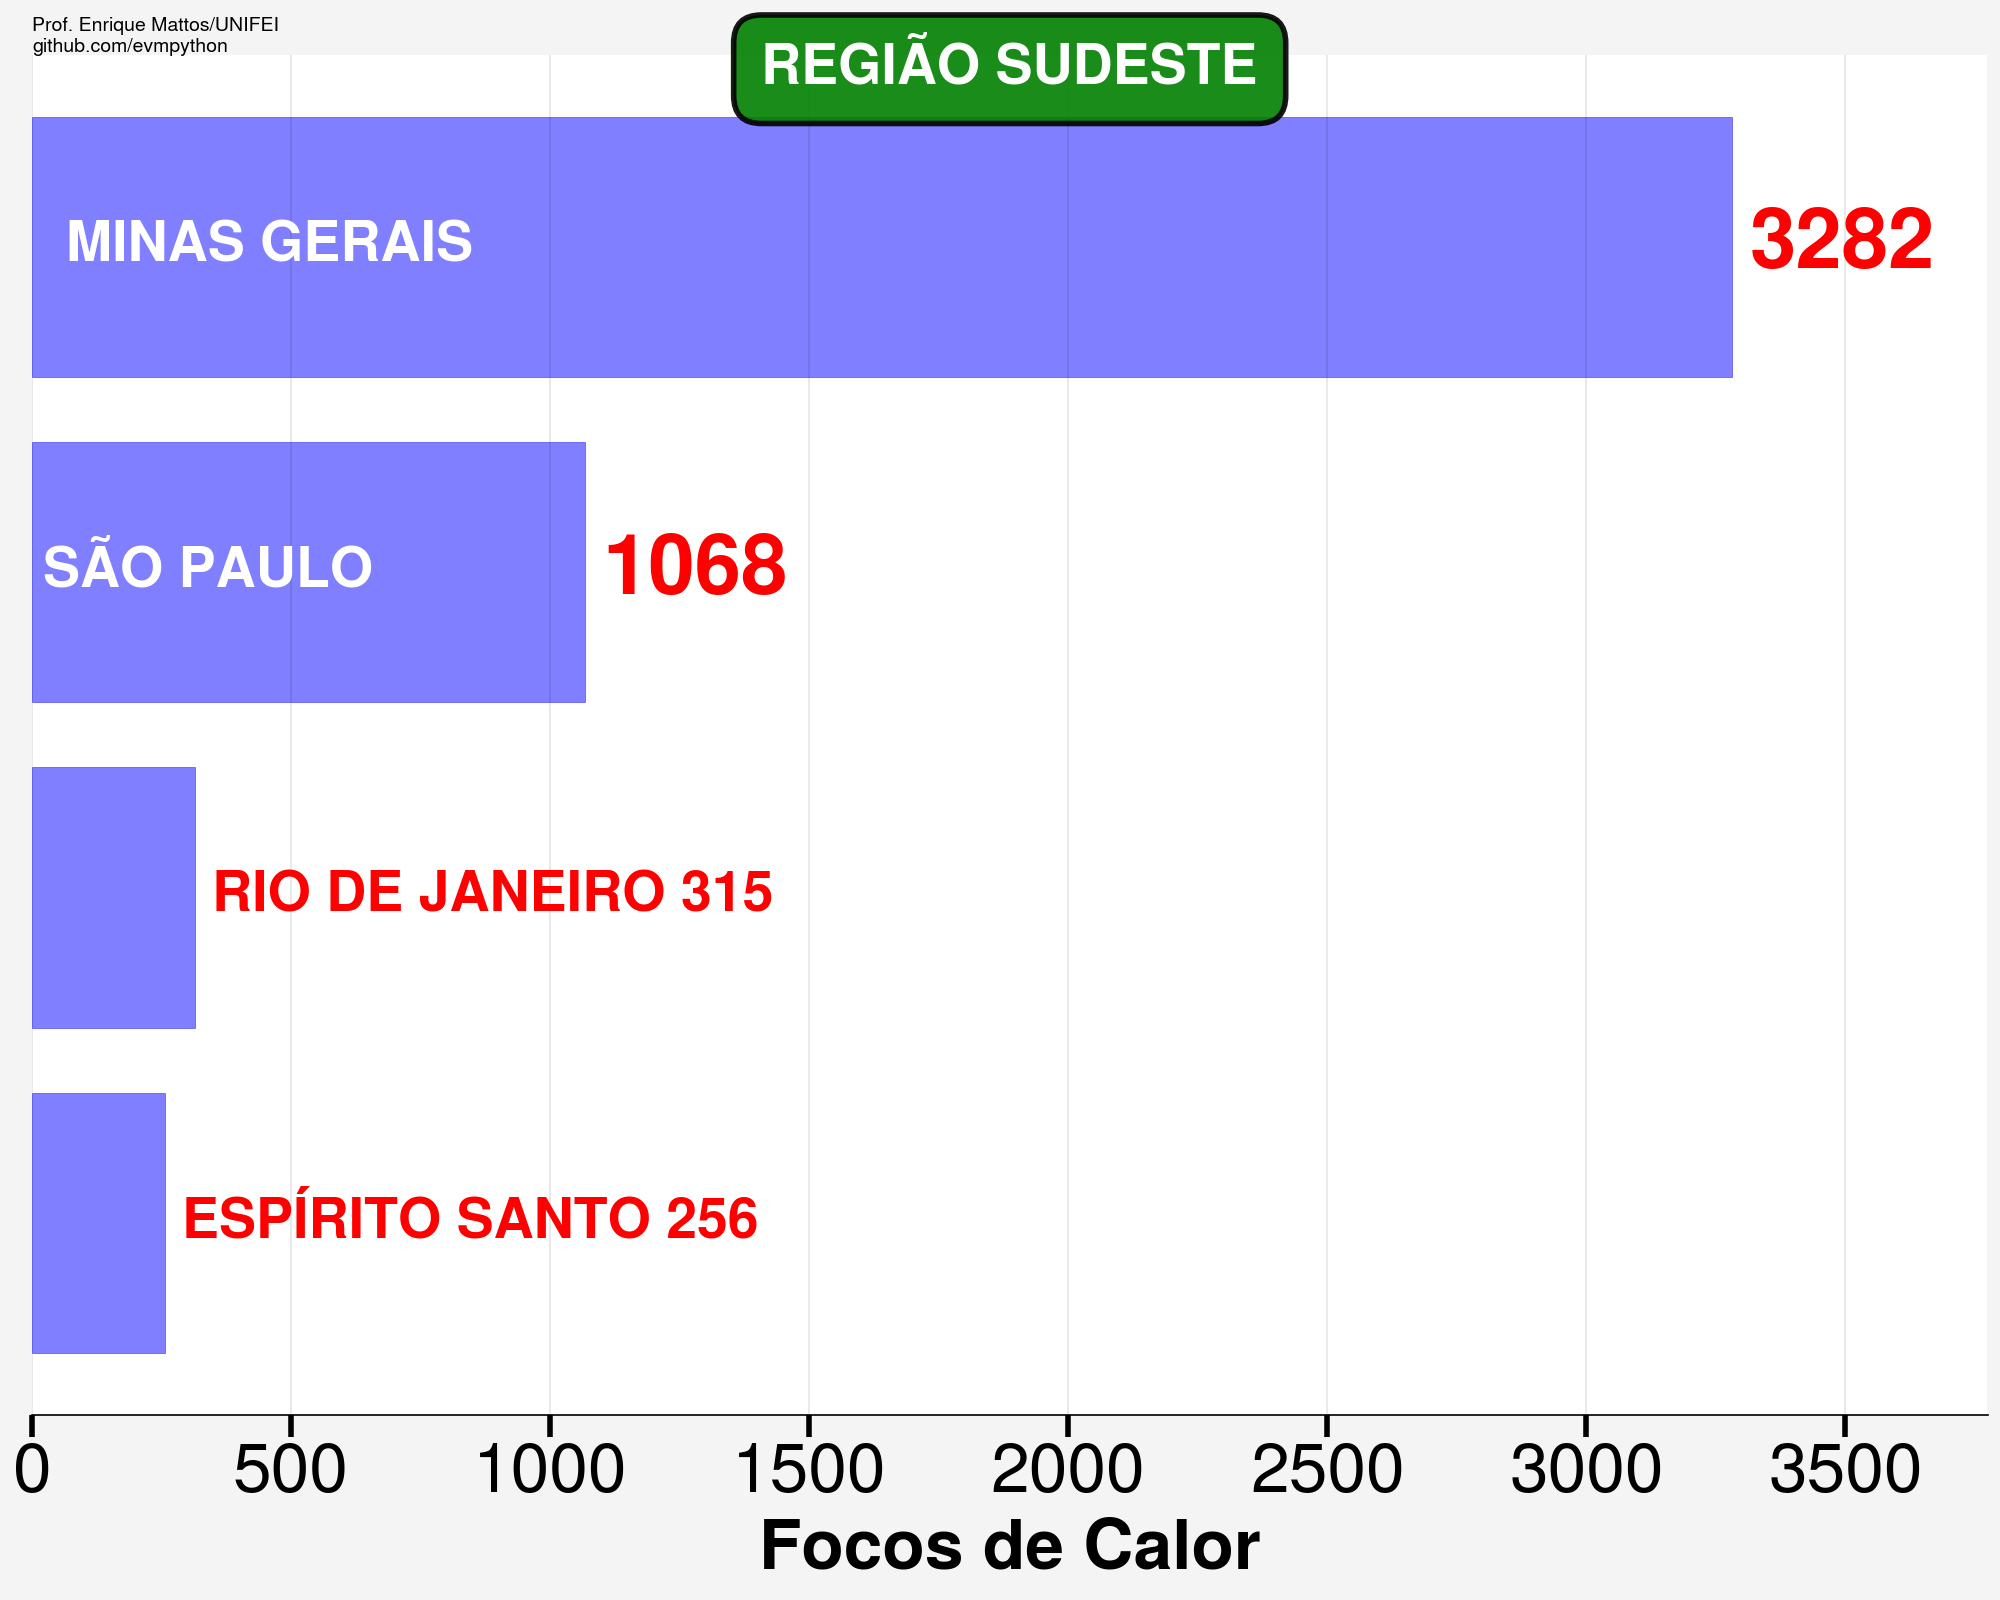

In [42]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,8), tight=True)

# Ordena os dados por ocorrências (do maior para o menor)
contagem_sudeste_ordenada = contagem_sudeste.sort_values('Ocorrências', ascending=False)

# plota gráfico de barras horizontais
bars = ax.barh(contagem_sudeste_ordenada['Estado'],
               contagem_sudeste_ordenada['Ocorrências'],
               color='blue',
               alpha=0.5)

# Remove o eixo Y (linhas e ticks)
ax.yaxis.set_visible(False)

# Adiciona os nomes dos estados e valores
for i, (bar, estado, ocorrencias) in enumerate(zip(bars, contagem_sudeste_ordenada['Estado'], contagem_sudeste_ordenada['Ocorrências'])):

    if ocorrencias < 500:
        # Para barras pequenas: coloca nome do estado e valor no final da barra
        ax.text(bar.get_width() + (max(contagem_sudeste_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{estado} {ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='red')
    else:
        # Para barras grandes: nome no início e valor no final
        # Nome do estado no início da barra
        ax.text(bar.get_width() * 0.02,
                bar.get_y() + bar.get_height()/2,
                estado,
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='white')

        # Valor no final da barra
        ax.text(bar.get_width() + (max(contagem_sudeste_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=30, fontweight='bold',
                color='red')

# Inverte o eixo Y para que a barra com maior valor fique no topo
ax.invert_yaxis()

# formatação do eixo com tamanho aumentado dos labels do eixo X
ax.format(xlabel='Focos de Calor',
          ylabel='',  # Remove o label do eixo Y
          small='25px',
          large='17px',
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

# Aumenta significativamente o tamanho dos labels do eixo X
ax.tick_params(axis='x', labelsize=25)  # Tamanho aumentado para 25

# Remove as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajusta os limites do eixo X para dar espaço para os textos
ax.set_xlim(0, max(contagem_sudeste_ordenada['Ocorrências']) * 1.15)

# Aumenta o tamanho do label do eixo X
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

# Aumenta também o tamanho dos ticks do eixo X
ax.tick_params(axis='x', which='major', length=8, width=2)

# Adiciona título personalizado com caixa amarela e texto vermelho
title = ax.text(0.5, 0.97, 'REGIÃO SUDESTE',
                transform=ax.transAxes,
                fontsize=20,
                fontweight='bold',
                color='white',
                ha='center',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='green',
                         edgecolor='black',
                         linewidth=2,
                         alpha=0.9))

# informação na figura
ax.text(1,-0.6, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black', zorder=5)

# salva figura
fig.savefig(f'08d_focos_por_estado_regiao_sudeste_2025.jpg', transparent=True, dpi=300, bbox_inches="tight")

# exibe figura na tela
uplt.show()

# **8° Passo:** Plota Figura - `REGIÃO SUL`

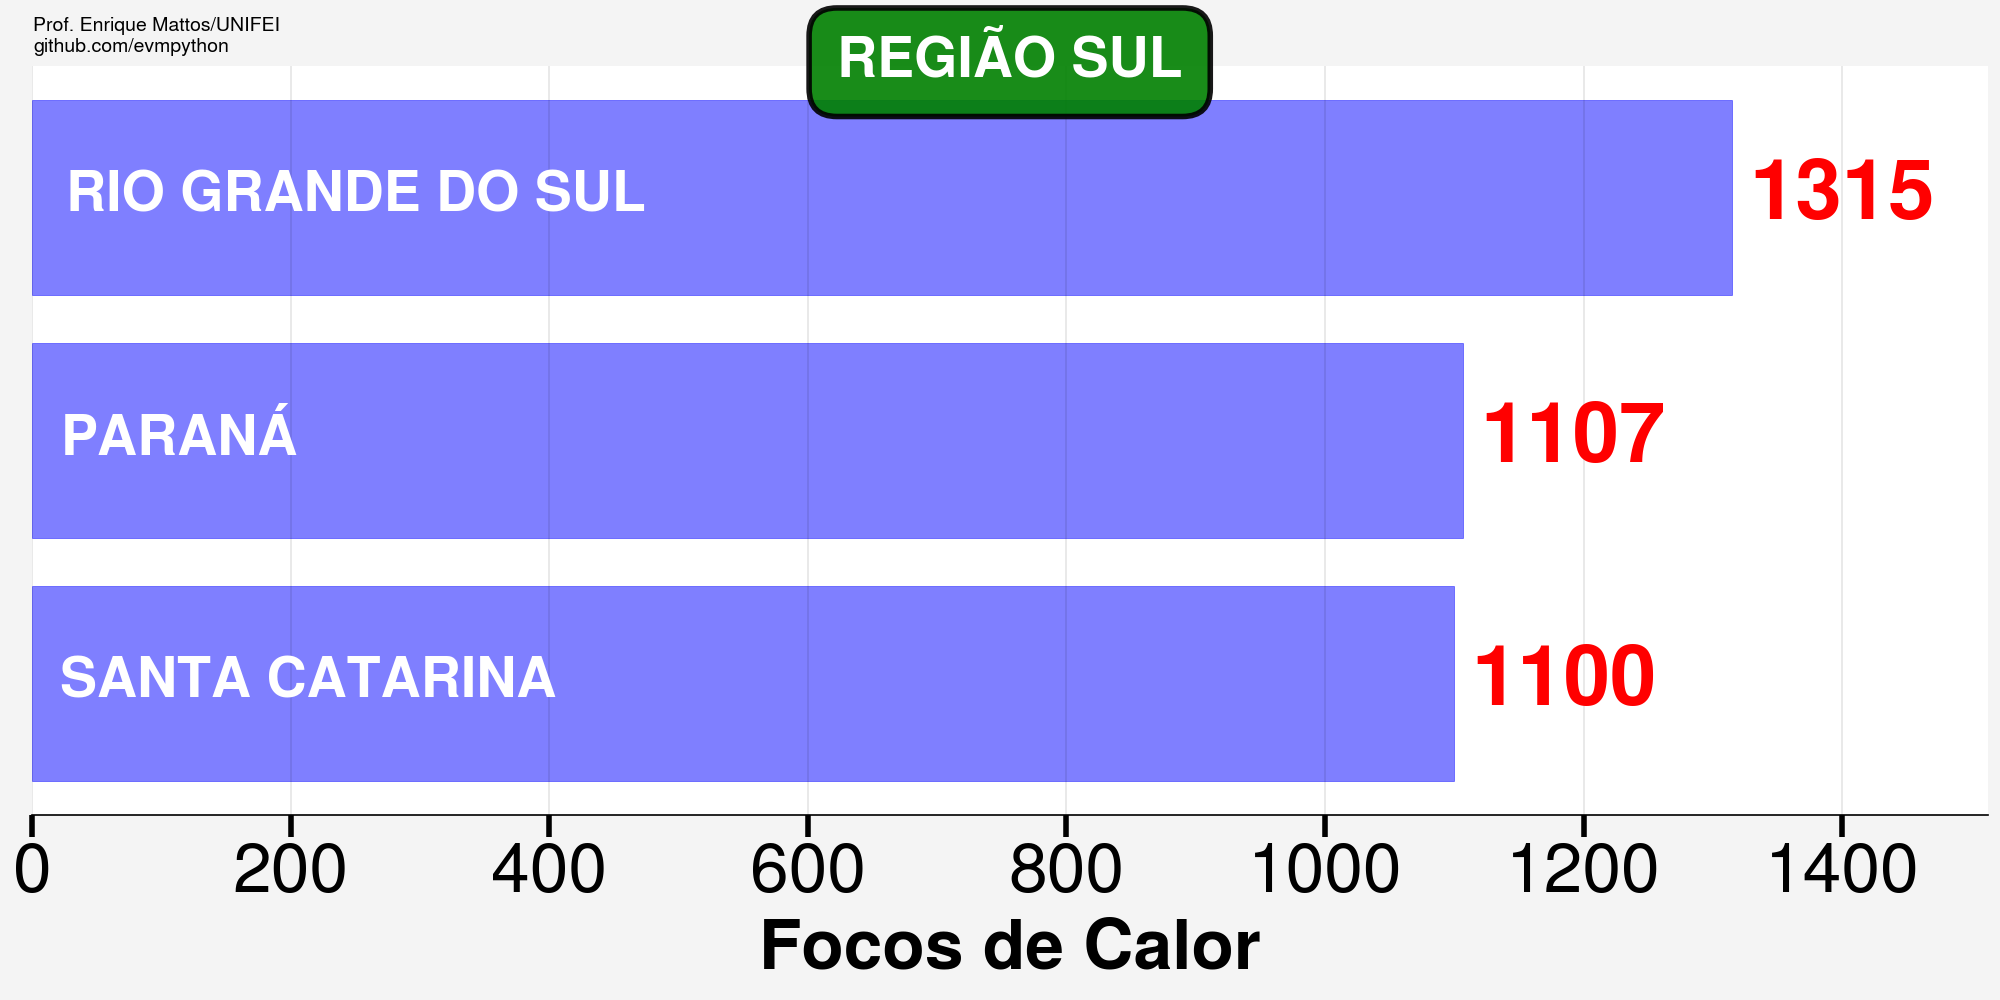

In [43]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,5), tight=True)

# Ordena os dados por ocorrências (do maior para o menor)
contagem_sul_ordenada = contagem_sul.sort_values('Ocorrências', ascending=False)

# plota gráfico de barras horizontais
bars = ax.barh(contagem_sul_ordenada['Estado'],
               contagem_sul_ordenada['Ocorrências'],
               color='blue',
               alpha=0.5)

# Remove o eixo Y (linhas e ticks)
ax.yaxis.set_visible(False)

# Adiciona os nomes dos estados e valores
for i, (bar, estado, ocorrencias) in enumerate(zip(bars, contagem_sul_ordenada['Estado'], contagem_sul_ordenada['Ocorrências'])):

    if ocorrencias < 500:
        # Para barras pequenas: coloca nome do estado e valor no final da barra
        ax.text(bar.get_width() + (max(contagem_sul_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{estado} {ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='red')
    else:
        # Para barras grandes: nome no início e valor no final
        # Nome do estado no início da barra
        ax.text(bar.get_width() * 0.02,
                bar.get_y() + bar.get_height()/2,
                estado,
                ha='left', va='center',
                fontsize=20, fontweight='bold',
                color='white')

        # Valor no final da barra
        ax.text(bar.get_width() + (max(contagem_sul_ordenada['Ocorrências']) * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{ocorrencias:.0f}',
                ha='left', va='center',
                fontsize=30, fontweight='bold',
                color='red')

# Inverte o eixo Y para que a barra com maior valor fique no topo
ax.invert_yaxis()

# formatação do eixo com tamanho aumentado dos labels do eixo X
ax.format(xlabel='Focos de Calor',
          ylabel='',  # Remove o label do eixo Y
          small='25px',
          large='17px',
          xtickminor=False,
          ytickminor=False,
          xrotation=0)

# Aumenta significativamente o tamanho dos labels do eixo X
ax.tick_params(axis='x', labelsize=25)  # Tamanho aumentado para 25

# Remove as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajusta os limites do eixo X para dar espaço para os textos
ax.set_xlim(0, max(contagem_sul_ordenada['Ocorrências']) * 1.15)

# Aumenta o tamanho do label do eixo X
ax.xaxis.label.set_fontsize(25)
ax.xaxis.label.set_fontweight('bold')

# Aumenta também o tamanho dos ticks do eixo X
ax.tick_params(axis='x', which='major', length=8, width=2)

# Adiciona título personalizado com caixa amarela e texto vermelho
title = ax.text(0.5, 0.97, 'REGIÃO SUL',
                transform=ax.transAxes,
                fontsize=20,
                fontweight='bold',
                color='white',
                ha='center',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='green',
                         edgecolor='black',
                         linewidth=2,
                         alpha=0.9))

# informação na figura
ax.text(1,-0.6, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black', zorder=5)

# salva figura
fig.savefig(f'08e_focos_por_estado_regiao_sul_2025.jpg', transparent=True, dpi=300, bbox_inches="tight")

# exibe figura na tela
uplt.show()